# Lab 06
**Class**: *CSCI 349 - Intro to Data Mining*
**Semester**: *2019 SP*
**Name**: *Mateen Qureshi*
**Instructor**: *Brian King*


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1) [P] Before you begin, print out your current working directory to understand where in your file system Python
thinks your script is running from**

In [2]:
import os
print(os.getcwd())

C:\csci349_2019sp\labs


**2) [P] Now, use pandas to read in your data file you downloaded above, which you should have placed in your
data directory. Call the data frame df_temps. Read in the entire dataset.**

In [3]:
data_dir = "..\data\\"
os.chdir(data_dir)
filename = "faa_hourly-KIPT_20180101-20181231.csv"

In [4]:
df_temps = pd.read_csv(filename, skiprows=16, parse_dates=['Date/Time (GMT)'])
df_temps.drop(labels=['Unnamed: 13'], axis=1, inplace=True)
df_temps = df_temps[df_temps["Date/Time (GMT)"] != "Date/Time (GMT)"]

**3) [P] Show the shape of your dataframe.**

In [5]:
df_temps.shape

(8693, 13)

**4) [P] Show the result of info().**

In [6]:
df_temps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 9126
Data columns (total 13 columns):
Date/Time (GMT)                  8693 non-null object
Number of Observations (n/a)     8693 non-null object
Average Temp (F)                 8687 non-null object
Max Temp (F)                     8687 non-null object
Min Temp (F)                     8687 non-null object
Average Dewpoint Temp (F)        8687 non-null object
1 Hour Precip (in)               1730 non-null object
Max Wind Gust (mph)              1044 non-null object
Average Relative Humidity (%)    8425 non-null object
Average Wind Speed (mph)         8680 non-null object
Average Station Pressure (mb)    8675 non-null object
Average Wind Direction (deg)     8279 non-null object
Max Wind Speed (mph)             8680 non-null object
dtypes: object(13)
memory usage: 950.8+ KB


**5) [P] Read about the memory_usage() method of pandas data frames. Then, report the total memory in
bytes for each variable of df_temps. Also, report the total memory required for the data frame. Set the
parameter drop=True, to get the most accurate assessment of your total memory usage.**

In [7]:
df_temps.memory_usage()

Index                            69544
Date/Time (GMT)                  69544
Number of Observations (n/a)     69544
Average Temp (F)                 69544
Max Temp (F)                     69544
Min Temp (F)                     69544
Average Dewpoint Temp (F)        69544
1 Hour Precip (in)               69544
Max Wind Gust (mph)              69544
Average Relative Humidity (%)    69544
Average Wind Speed (mph)         69544
Average Station Pressure (mb)    69544
Average Wind Direction (deg)     69544
Max Wind Speed (mph)             69544
dtype: int64

In [8]:
old_usage = df_temps.memory_usage(deep=True).sum()
print('Total Memory Usage is {} bytes'.format(old_usage))

Total Memory Usage is 6732694 bytes


**6) [P, M] Report the current index. You have 8693 observations, but the index still goes from 0 to 9126. Why?**

In [9]:
df_temps.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9117, 9118, 9119, 9120, 9121, 9122, 9123, 9124, 9125, 9126],
           dtype='int64', length=8693)

It still reports 9126 because when I removed the duplicate headers, the dataframe wasn't reindexed to reflect the removed rows.

**7) [P] Reindex your data, and show that the new index is indeed reset. (There are many ways to do this. I suggest
using reset_index(). There is no need to retain the original index, so drop=True is fine.)**

In [10]:
df_temps.reset_index(drop=True, inplace=True)
df_temps.index

RangeIndex(start=0, stop=8693, step=1)

In [11]:
df_temps.iloc[:,0].name

'Date/Time (GMT)'

**8) [P] I cannot emphasize this enough – you will get the most out of your data when you take the time to set up
the most accurate type for each variable. Currently, the type of every variable is object. However, notice
that in your raw data file, EVERY variable is a number except the first variable, which is a date. Dates are
COMMON in data, and it is important that you represent dates as actual date types! We'll deal with that
shortly. Convert all numeric data to actual numeric data types. You'll need to look up how to do this. (HINT:
pd.to_numeric() is your friend.) Leave the NaN fields alone! The fact that they are missing is
IMPORTANT! And, leave the date/time variable in the first column alone.
You should output the shape of your data, and show info() to show every variable is a floating point
number**

In [12]:
cols = df_temps.columns.drop("Date/Time (GMT)")
df_temps[cols] = df_temps[cols].apply(pd.to_numeric, errors='coerce', axis=0)
print("Shape of data is {}".format(df_temps.shape))


Shape of data is (8693, 13)


In [13]:
df_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
Date/Time (GMT)                  8693 non-null object
Number of Observations (n/a)     8693 non-null int64
Average Temp (F)                 8687 non-null float64
Max Temp (F)                     8687 non-null float64
Min Temp (F)                     8687 non-null float64
Average Dewpoint Temp (F)        8687 non-null float64
1 Hour Precip (in)               1730 non-null float64
Max Wind Gust (mph)              1044 non-null float64
Average Relative Humidity (%)    8425 non-null float64
Average Wind Speed (mph)         8680 non-null float64
Average Station Pressure (mb)    8675 non-null float64
Average Wind Direction (deg)     8279 non-null float64
Max Wind Speed (mph)             8680 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 883.0+ KB


**9) [P] Show the current total memory usage after converting your data types? There should be a substantial drop
in your memory footprint! Report the percentage that your memory was reduced.**

In [14]:
new_usage = df_temps.memory_usage(deep=True).sum()
print('Total Memory Usage is {} bytes'.format(new_usage))
print('Percentage reduction is {0:.2f} %'.format((old_usage-new_usage)/old_usage*100))

Total Memory Usage is 1495276 bytes
Percentage reduction is 77.79 %


**10) [P] Did you notice that to_numeric() has a parameter called downcast? Go back and read about this
parameter. By default, most of the time your integer types will be converted to a 64-bit integer, and floating
point types will use double precision numbers. You can do even better. Read about this parameter, and
downcast your types accordingly. Report the percentage that your memory was reduced from the previous
step, as well as from your first**

In [15]:
conversions = {np.dtype(np.int64):'unsigned',np.dtype(np.float64):'float'}
df_temps[cols] = df_temps[cols].apply(lambda x: pd.to_numeric(x, errors='coerce', downcast=conversions[x.dtype]), axis=0)
downcast_usage = df_temps.memory_usage(deep=True).sum()
print('Percentage reduction from previous step is {0:.2f} %'.format((new_usage-downcast_usage)/new_usage*100))
print('Percentage reduction from first step is {0:.2f} %'.format((old_usage-downcast_usage)/old_usage*100))

Percentage reduction from previous step is 29.65 %
Percentage reduction from first step is 84.38 %


**11) At this point, you should have good data to start working with (with the exception of the date column. Verify it
by outputting the results of describe(). Every variable should have its basic stats reported.**

In [16]:
df_temps.describe()

,Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
count,8693.000000,8687.000000,8687.000000,8687.000000,8687.000000,1730.000000,1044.000000,8425.000000,8680.000000,8675.000000,8279.000000,8680.000000
mean,1.399747,51.752987,51.847435,51.662914,41.679428,0.040006,23.856617,71.532364,6.033965,1017.902222,153.428192,6.325367
std,0.903277,19.336796,19.362728,19.315928,20.122921,0.088109,5.003509,19.806757,5.022885,7.417259,123.157219,5.109391
min,1.000000,-2.900000,-2.900000,-2.900000,-11.000000,0.000000,16.100000,9.000000,0.000000,986.000000,0.000000,0.000000
25%,1.000000,36.000000,36.000000,36.000000,25.000000,0.000000,20.700001,57.000000,1.750000,1013.200012,2.085000,3.500000
50%,1.000000,51.099998,51.099998,50.000000,42.099998,0.010000,23.000000,75.000000,5.800000,1017.900024,133.330002,5.800000
75%,1.000000,69.099998,69.099998,69.099998,60.099998,0.040000,26.500000,89.000000,9.200000,1022.400024,270.000000,9.200000
max,8.000000,96.099998,96.099998,96.099998,76.449997,1.480000,54.099998,100.000000,35.700001,1043.699951,360.000000,36.799999


**12) [M] What are the four primary classes in pandas for working with dates and times? What is each used for?**

*Timestamp*: Represents a single timestamp at a point in time
<br>
*DatetimeIndex*: Index of *Timestamp*
<br>
*Period*: Represents a single time span
<br>
*PeriodIndex*: Index of *Period*

**13) [M] What is the name of the pandas function that is used to convert string objects or other types to a
Timestamp object?**

pandas.to_datetime

**14) [P] Create a Timestamp object from the string "07/04/19", which is a date representing July 4, 2019.
Store the object as d1 and show it.**

In [17]:
d1 = pd.to_datetime("07/04/19")
d1

Timestamp('2019-07-04 00:00:00')

**15) [P] Using d1 and string formatting capabilities, print the string
"Today's date is Thursday, July 4, 2019".**

In [18]:
print("Today's date is {}, {} {}, {}".format(d1.day_name(), d1.month_name(), d1.day, d1.year))

Today's date is Thursday, July 4, 2019


**16) [P] Create another Timestamp object representing Sept 7, 2019 at 3pm, called d2. Report it**

In [19]:
d2 = pd.Timestamp("09/07/19 3pm")
d2

Timestamp('2019-09-07 15:00:00')

**17) [P] Subtract d2 – d1, and report the difference as the number of days and seconds between these two. Also
report the difference as total seconds. (NOTE: The difference should be 65 days, 54000 seconds. Or 5670000
total seconds.)**

In [20]:
diff = d2 - d1
print("Difference between d2 and d1 is {} days and {} seconds".format(diff.days, diff.seconds))
print("Difference in total seconds is {}".format(round(diff.total_seconds())))

Difference between d2 and d1 is 65 days and 54000 seconds
Difference in total seconds is 5670000


**18) [P] Create a new Timestamp object from the string "2019-07-01 08:30pm", but, localize the time
stamp to represent the time in the US Eastern Time Zone. Store the result as d3 and output it.**

In [21]:
d3 = pd.Timestamp("2019-07-01 08:30pm", tz='US/Eastern')
d3

Timestamp('2019-07-01 20:30:00-0400', tz='US/Eastern')

**19) [P] Show time represented by d3, but converted to the US / Pacific Time Zone. The time reported should be
three hours earlier than EST shown in the previous question.**

In [22]:
d3.tz_convert('US/Pacific')

Timestamp('2019-07-01 17:30:00-0700', tz='US/Pacific')

**20) [P] Create a Timestamp object representing right now, stored as ts_now. Report the result.**

In [23]:
ts_now = pd.Timestamp('now')
ts_now

Timestamp('2019-02-06 22:23:54.960827')

**21) [P] Create a Timedelta object representing 1 hour, stored as td_hour. Report the result.**

In [24]:
td_hour = pd.Timedelta('1 hour')
td_hour

Timedelta('0 days 01:00:00')

**22) [P] Demonstrate how you can do basic mathematical operations by adding 6 hours to ts_now using
td_hour and basic math operations. (i.e. No loops or further calculations necessary!)**

In [25]:
ts_now + 6 * td_hour

Timestamp('2019-02-07 04:23:54.960827')

**23) [P] Create a DatetimeIndex object that represents every hour during the month of January, 2019. The first
index should be midnight, January 1, 2019, and the last index should be January 31, 2019 at 11pm. Store the
object as dr. (HINT – use the pd.date_range() method!)**

In [26]:
dr = pd.DatetimeIndex(pd.date_range(start='January 1, 2019',end='January 31, 2019',freq='H'))
dr

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2019-01-30 15:00:00', '2019-01-30 16:00:00',
               '2019-01-30 17:00:00', '2019-01-30 18:00:00',
               '2019-01-30 19:00:00', '2019-01-30 20:00:00',
               '2019-01-30 21:00:00', '2019-01-30 22:00:00',
               '2019-01-30 23:00:00', '2019-01-31 00:00:00'],
              dtype='datetime64[ns]', length=721, freq='H')

**24) [P] Now, deal with that first column of data. It's currently an object. Use it to form the index of df_temps
to be a DatetimeIndex type. NOTE: You can NOT simply generate this column using your own date range
object! You must generate it directly from the actual time/date stamp in the data! Why? This is very
important. Do NOT ever be fooled into thinking any real-world dataset you are dealing with is 100%
complete. If you simply try to use a date range between 1/1 – 12/31, with every hour, you are making an incorrect assumption that every observation is present! WRONG!**

In [27]:
df_temps.index = pd.DatetimeIndex(df_temps['Date/Time (GMT)'])

**25) [P] Confirm that your index is indeed matching your first column of data, then use the drop method to
eliminate the first column of time / date data. It is now your index, and thus there is no need to keep this
information twice.**

In [28]:
df_temps.head()

,Date/Time (GMT),Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
Date/Time (GMT),,,,,,,,,,,,,
2018-01-01 00:00:00,2018-01-01 00:00:00,1,10.0,10.0,10.0,-5.1,NaN,NaN,49.0,6.9,1028.099976,310.0,6.9
2018-01-01 01:00:00,2018-01-01 01:00:00,1,8.1,8.1,8.1,-5.1,NaN,NaN,54.0,0.0,1028.400024,0.0,0.0
2018-01-01 02:00:00,2018-01-01 02:00:00,1,7.0,7.0,7.0,-4.0,NaN,NaN,60.0,0.0,1028.800049,0.0,0.0
2018-01-01 03:00:00,2018-01-01 03:00:00,1,3.9,3.9,3.9,-5.1,NaN,NaN,65.0,3.5,1029.099976,240.0,3.5
2018-01-01 04:00:00,2018-01-01 04:00:00,1,9.0,9.0,9.0,-2.9,NaN,NaN,58.0,9.2,1029.099976,270.0,9.2


In [29]:
df_temps.drop(labels=['Date/Time (GMT)'], axis=1, inplace=True)

In [30]:
df_temps.head()

,Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
Date/Time (GMT),,,,,,,,,,,,
2018-01-01 00:00:00,1,10.0,10.0,10.0,-5.1,NaN,NaN,49.0,6.9,1028.099976,310.0,6.9
2018-01-01 01:00:00,1,8.1,8.1,8.1,-5.1,NaN,NaN,54.0,0.0,1028.400024,0.0,0.0
2018-01-01 02:00:00,1,7.0,7.0,7.0,-4.0,NaN,NaN,60.0,0.0,1028.800049,0.0,0.0
2018-01-01 03:00:00,1,3.9,3.9,3.9,-5.1,NaN,NaN,65.0,3.5,1029.099976,240.0,3.5
2018-01-01 04:00:00,1,9.0,9.0,9.0,-2.9,NaN,NaN,58.0,9.2,1029.099976,270.0,9.2


**26) [P] Give one final report on the % memory reduction made now, compared to when you first loaded in the
data. Again, please take this seriously. This is a substantial amount of memory saved! Why? Because you took
the time to properly process every column to have it represent its most accurate type, using the smallest type
necessary. HUGE savings!**

In [31]:
usage_after_index = df_temps.memory_usage(deep=True).sum()
print('Percentage reduction from first step is {0:.2f} %'.format((old_usage-usage_after_index)/old_usage*100))


Percentage reduction from first step is 93.16 %


**27) [P] As the previous question suggested, this dataset has missing observations! How may records are missing?
Compute this by reporting the number of observations you expect to see with 24 observations over 365 days,
and then report the number of actual observations. What is the difference? This is the number of observations
that are potentially missing!**

In [32]:
print("Expected observations are {}".format(24*365))
print("Actual observations are {}".format(df_temps.shape[0]))
print("Difference is {}".format(24*365 - df_temps.shape[0]))

Expected observations are 8760
Actual observations are 8693
Difference is 67


**28) [P] Time to investigate. Write code to perform a sanity check on the occurrence of index entries for every hour
of every day between Jan 1, 2018 at midnight, through December 31, 2018, at 23:00. Report the observations
that are missing, and any observations that are duplicate. Report the total quantity of both.**

In [33]:
df_dr = pd.DatetimeIndex(pd.date_range(start='January 1, 2018',end='December 31, 2018',freq='H'))
missing = df_dr[~df_dr.isin(df_temps.index)].size
no_duplicates = df_temps.index.drop_duplicates().size
print("{} observations are missing".format(missing))
print("{} observations are duplicates".format(df_temps.shape[0] - no_duplicates))

67 observations are missing
0 observations are duplicates


**29) [P] The next step is to assess missing data in each variable. Use the isna() method on df_temps to report
the total number of entries in each variable that have missing values.**

In [34]:
df_temps.isna().sum()

Number of Observations (n/a)        0
Average Temp (F)                    6
Max Temp (F)                        6
Min Temp (F)                        6
Average Dewpoint Temp (F)           6
1 Hour Precip (in)               6963
Max Wind Gust (mph)              7649
Average Relative Humidity (%)     268
Average Wind Speed (mph)           13
Average Station Pressure (mb)      18
Average Wind Direction (deg)      414
Max Wind Speed (mph)               13
dtype: int64

**30) [M] Which variables seem to have the most consistent, complete observations? Which are missing the most?
Are they really "missing", or are they observations where an event did not occur? Discuss.**

Number of observations has no missing values, while temperature was not recorded for 6 observations (it could be inferred that the same observations were missed for Max, Min, and Average Dewpoints). Missed values for max wind gust and precipitation were the highest, although I think they don't really matter since those are events occuring relatively rarely.

**31) [P] Report the time stamps that have missing temperatures. Do you see a pattern? Do they happen on a
particular day of the week? Or time?**

In [35]:
bools = df_temps.isna()
query = bools[bools['Average Temp (F)'] == True].index
df_temps.loc[query]

,Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
Date/Time (GMT),,,,,,,,,,,,
2018-03-15 14:00:00,1,NaN,NaN,NaN,NaN,NaN,17.299999,NaN,11.5,1002.700012,260.0,11.5
2018-03-15 15:00:00,1,NaN,NaN,NaN,NaN,NaN,17.299999,NaN,11.5,1002.400024,260.0,11.5
2018-05-07 14:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,1020.000000,NaN,3.5
2018-09-05 14:00:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1024.300049,0.0,0.0
2018-11-29 13:00:00,1,NaN,NaN,NaN,NaN,NaN,28.799999,NaN,19.6,1016.299988,270.0,19.6
2018-11-29 14:00:00,1,NaN,NaN,NaN,NaN,NaN,25.299999,NaN,19.6,1016.900024,270.0,19.6


The first two occur on the same day and last two occur on the same day, while all of them occur between 1 pm and 3 pm.

**32) [P] Create a new categorical variable in df_temps called "Quarter", an ordinal, that is "Q1" if the month
is 1-3, "Q2" if the month is 4-6, "Q3" if the month is 7-9, and "Q4" if the month is 10-12.**

In [36]:
df_temps["Quarter"] = df_temps.index.quarter
df_temps["Quarter"] = df_temps["Quarter"].apply(lambda x : 'Q' + str(x))
df_temps.head()

,Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph),Quarter
Date/Time (GMT),,,,,,,,,,,,,
2018-01-01 00:00:00,1,10.0,10.0,10.0,-5.1,NaN,NaN,49.0,6.9,1028.099976,310.0,6.9,Q1
2018-01-01 01:00:00,1,8.1,8.1,8.1,-5.1,NaN,NaN,54.0,0.0,1028.400024,0.0,0.0,Q1
2018-01-01 02:00:00,1,7.0,7.0,7.0,-4.0,NaN,NaN,60.0,0.0,1028.800049,0.0,0.0,Q1
2018-01-01 03:00:00,1,3.9,3.9,3.9,-5.1,NaN,NaN,65.0,3.5,1029.099976,240.0,3.5,Q1
2018-01-01 04:00:00,1,9.0,9.0,9.0,-2.9,NaN,NaN,58.0,9.2,1029.099976,270.0,9.2,Q1


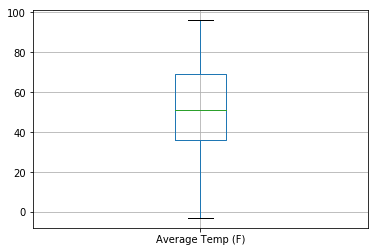

In [37]:
df_temps.boxplot(column='Average Temp (F)')
plt.show()

**34) [P] Draw a boxplot showing the distribution of the average temperature for each quarter.**

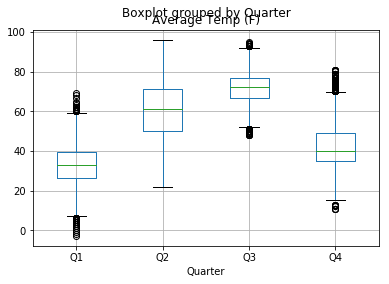

In [38]:
df_temps.boxplot(column='Average Temp (F)', by='Quarter')
plt.show()

**35) [P] Plot the average temperature for the entire year. (NOTE: Some plots are very simply completed using
matplotlib. You can still obtain the look and feel of seaborn by using sns.set_style() first, then
plt.plot())**

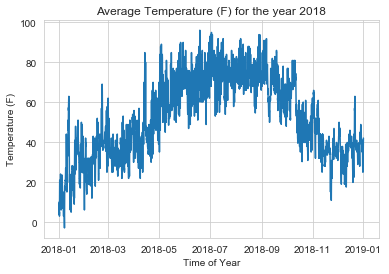

In [39]:
sns.set_style(style='whitegrid')
plt.plot(df_temps["Average Temp (F)"])
plt.xlabel("Time of Year")
plt.ylabel("Temperature (F)")
plt.title("Average Temperature (F) for the year 2018")
plt.show()